> ***ANALISIS HUBUNGAN NILAI KURS DENGAN TINGKAT PENGANGGURAN (%)***


**Kelompok 10, Kelas 2024E**


1.   Salma Latifa Kamil		      NIM 24031554089
2.   Vincentius Putra Mahardika 	NIM 24031554110

In [ ]:
!pip install pycountry
!pip install thefuzz[speedup]
!pip install pycountry-convert

import numpy as np
import pandas as pd
from thefuzz import process
import pycountry
import pycountry_convert as pc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.3/252.3 kB 11.6 MB/s eta 0:00:00


# Data Pengangguran

In [ ]:
df1 = pd.read_csv("Data_Pengangguran.csv")
print("Dataset shape:", df1.shape)
df1

Dataset shape: (45754, 11)


,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Aruba,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15+",2011,8.90,NaN,NaN,NaN,NaN
1,Aruba,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15+",2011,8.60,NaN,NaN,NaN,NaN
2,Aruba,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Female,"Age (Youth, adults): 15+",2011,7.80,NaN,NaN,NaN,NaN
3,Aruba,PC - Population and Housing Census,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15+",2010,10.60,NaN,Nonstandard age group: Including age 14,NaN,Data reference period: September | Age coverag...
4,Aruba,PC - Population and Housing Census,SDG indicator 8.5.2 - Unemployment rate (%),Total,"Age (Youth, adults): 15-24",2010,28.86,NaN,Nonstandard age group: Including age 14,NaN,Data reference period: September | Age coverag...
...,...,...,...,...,...,...,...,...,...,...,...
45749,Zimbabwe,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 15-24",2004,7.13,NaN,NaN,NaN,Data reference period: June | Geographical cov...
45750,Zimbabwe,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Male,"Age (Youth, adults): 25+",2004,2.75,NaN,NaN,NaN,Data reference period: June | Geographical cov...
45751,Zimbabwe,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Female,"Age (Youth, adults): 15+",2004,4.53,NaN,NaN,NaN,Data reference period: June | Geographical cov...
45752,Zimbabwe,LFS - Labour Force Survey,SDG indicator 8.5.2 - Unemployment rate (%),Female,"Age (Youth, adults): 15-24",2004,8.13,NaN,NaN,NaN,Data reference period: June | Geographical cov...


In [ ]:
df1.isna().sum()

,0
ref_area.label,0
source.label,0
indicator.label,0
sex.label,0
classif1.label,0
time,0
obs_value,77
obs_status.label,43686
note_classif.label,45187
note_indicator.label,43437


In [ ]:
# Drop kolom yg nan > 50%
df1 = df1.drop(columns=[
    'obs_status.label', 'note_classif.label', 'note_indicator.label',
    'note_source.label', 'source.label', 'indicator.label'
], errors='ignore')
df1

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Aruba,Total,"Age (Youth, adults): 15+",2011,8.90
1,Aruba,Male,"Age (Youth, adults): 15+",2011,8.60
2,Aruba,Female,"Age (Youth, adults): 15+",2011,7.80
3,Aruba,Total,"Age (Youth, adults): 15+",2010,10.60
4,Aruba,Total,"Age (Youth, adults): 15-24",2010,28.86
...,...,...,...,...,...
45749,Zimbabwe,Male,"Age (Youth, adults): 15-24",2004,7.13
45750,Zimbabwe,Male,"Age (Youth, adults): 25+",2004,2.75
45751,Zimbabwe,Female,"Age (Youth, adults): 15+",2004,4.53
45752,Zimbabwe,Female,"Age (Youth, adults): 15-24",2004,8.13


In [ ]:
# Cek brp byk negara sesuai kondisi
df1_filtered = df1[(df1['sex.label'] == 'Total') & (df1['time'] == 2022) & (df1['classif1.label'] == 'Age (Youth, adults): 25+')]

jumlah_country = df1_filtered['ref_area.label'].nunique()

print(f"Ada {jumlah_country} negara")

Ada 211 negara


In [ ]:
# Drop sesuai kondisi (sisa yg sex label total, dan time 2022, age 25+)
df1 = df1[(df1['sex.label'] == 'Total') & (df1['time'] == 2022) & (df1['classif1.label'] == 'Age (Youth, adults): 25+')]

print(df1.head())
print(f"Jumlah baris setelah difilter: {len(df1)}")

           ref_area.label sex.label            classif1.label  time  obs_value
77                 Angola     Total  Age (Youth, adults): 25+  2022      9.757
170               Albania     Total  Age (Youth, adults): 25+  2022      9.224
422  United Arab Emirates     Total  Age (Youth, adults): 25+  2022      2.265
509             Argentina     Total  Age (Youth, adults): 25+  2022      5.091
675               Armenia     Total  Age (Youth, adults): 25+  2022      6.771
Jumlah baris setelah difilter: 211


In [ ]:
df1

,ref_area.label,sex.label,classif1.label,time,obs_value
77,Angola,Total,"Age (Youth, adults): 25+",2022,9.757
170,Albania,Total,"Age (Youth, adults): 25+",2022,9.224
422,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265
509,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091
675,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771
...,...,...,...,...,...
44884,World: Lower-middle income excluding India,Total,"Age (Youth, adults): 25+",2022,3.569
45127,World: Upper-middle income excluding China,Total,"Age (Youth, adults): 25+",2022,5.822
45388,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717
45604,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941


In [ ]:
df1.isna().sum()

,0
ref_area.label,0
sex.label,0
classif1.label,0
time,0
obs_value,2


In [ ]:
# replace nan dengan mean
print("Jumlah NaN sebelum:", df1['obs_value'].isna().sum())

df1['obs_value'].fillna(df1['obs_value'].median(), inplace=True)

print("Jumlah NaN sesudah:", df1['obs_value'].isna().sum())

Jumlah NaN sebelum: 2
Jumlah NaN sesudah: 0


/tmp/ipython-input-238600593.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['obs_value'].fillna(df1['obs_value'].median(), inplace=True)
/tmp/ipython-input-238600593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['obs_value'].fillna(df1['obs_value'].median(), inplace=True)


In [ ]:
df1

,ref_area.label,sex.label,classif1.label,time,obs_value
77,Angola,Total,"Age (Youth, adults): 25+",2022,9.757
170,Albania,Total,"Age (Youth, adults): 25+",2022,9.224
422,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265
509,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091
675,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771
...,...,...,...,...,...
44884,World: Lower-middle income excluding India,Total,"Age (Youth, adults): 25+",2022,3.569
45127,World: Upper-middle income excluding China,Total,"Age (Youth, adults): 25+",2022,5.822
45388,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717
45604,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941


In [ ]:
df1.rename(columns={
    'ref_area.label': 'Nama_Negara',
    'sex.label': 'Jenis_Kelamin',
    'classif1.label': 'Umur',
    'time': 'Tahun',
    'obs_value': 'Tingkat Pengangguran (%)',
}, inplace=True)

/tmp/ipython-input-2331785419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={


In [ ]:
df1

,Nama_Negara,Jenis_Kelamin,Umur,Tahun,Tingkat Pengangguran (%)
77,Angola,Total,"Age (Youth, adults): 25+",2022,9.757
170,Albania,Total,"Age (Youth, adults): 25+",2022,9.224
422,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265
509,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091
675,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771
...,...,...,...,...,...
44884,World: Lower-middle income excluding India,Total,"Age (Youth, adults): 25+",2022,3.569
45127,World: Upper-middle income excluding China,Total,"Age (Youth, adults): 25+",2022,5.822
45388,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717
45604,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941


In [ ]:
daftar_negara = [country.name for country in pycountry.countries]

In [ ]:
df1 = df1[df1['Nama_Negara'].isin(daftar_negara)]
print(df1['Nama_Negara'].unique())
print(f"Jumlah baris setelah dibersihkan: {len(df1)}")

['Angola' 'Albania' 'United Arab Emirates' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Belgium' 'Benin' 'Burkina Faso'
 'Bangladesh' 'Bulgaria' 'Bosnia and Herzegovina' 'Belarus' 'Brazil'
 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Canada' 'Switzerland'
 'Chile' "Côte d'Ivoire" 'Colombia' 'Costa Rica' 'Cyprus' 'Czechia'
 'Germany' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'Spain'
 'Estonia' 'Finland' 'France' 'Ghana' 'Guinea-Bissau' 'Greece' 'Guatemala'
 'Honduras' 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iceland'
 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kazakhstan' 'Kenya'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Saint Lucia' 'Sri Lanka'
 'Lithuania' 'Luxembourg' 'Latvia' 'Morocco' 'Madagascar' 'Mexico'
 'North Macedonia' 'Mali' 'Malta' 'Montenegro' 'Mongolia' 'Mozambique'
 'Mauritius' 'Malaysia' 'New Caledonia' 'Niger' 'Nigeria' 'Niue'
 'Netherlands' 'Norway' 'New Zealand' 'Panama' 'Peru' 'Philippines'
 'Papua New Guinea' 'Poland

In [ ]:
df1

,Nama_Negara,Jenis_Kelamin,Umur,Tahun,Tingkat Pengangguran (%)
77,Angola,Total,"Age (Youth, adults): 25+",2022,9.757
170,Albania,Total,"Age (Youth, adults): 25+",2022,9.224
422,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265
509,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091
675,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771
...,...,...,...,...,...
23908,Viet Nam,Total,"Age (Youth, adults): 25+",2022,1.056
24136,Samoa,Total,"Age (Youth, adults): 25+",2022,3.225
45388,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717
45604,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941


# Data Kurs

In [ ]:
df2 = pd.read_csv("Data_Kurs.csv")
df2

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,Afghanistan,AFG,39.276429270146,47.3575747311828,61.1434615416667,67.8660857692308,68.0269040822312,72.083247177304,77.7379491783367,76.8135364354897,..,..,..,..
1,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,Albania,ALB,..,143.709416666667,125.961666666667,124.1425,119.1,107.989166666667,109.850833333333,108.65,103.52,113.041666666667,100.645,93.1233333333333
2,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,Algeria,DZA,8.95750833333333,75.2597916666666,100.691433333333,109.443066666667,110.973016666667,116.593791666667,119.353558333333,126.7768,135.064058333333,141.994975,135.842933333333,134.053241666667
3,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,American Samoa,ASM,1,1,1,1,1,1,1,1,1,1,1,1
4,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,Andorra,AND,..,..,..,..,..,..,..,..,0.845376564367945,0.950915533962108,0.924709622987356,0.924367447270267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df2.columns.tolist())

['Series Name', 'Series Code', 'Country Name', 'Country Code', '1990 [YR1990]', '2000 [YR2000]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']


In [ ]:
df2 = df2.drop(columns=['Series Name', 'Series Code', 'Country Code', '1990 [YR1990]', '2000 [YR2000]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2023 [YR2023]', '2024 [YR2024]'], errors='ignore')
df2

,Country Name,2022 [YR2022]
0,Afghanistan,..
1,Albania,113.041666666667
2,Algeria,141.994975
3,American Samoa,1
4,Andorra,0.950915533962108
...,...,...
266,NaN,NaN
267,NaN,NaN
268,NaN,NaN
269,NaN,NaN


In [ ]:
df2['2022 [YR2022]'] = pd.to_numeric(df2['2022 [YR2022]'], errors='coerce')
df2

,Country Name,2022 [YR2022]
0,Afghanistan,NaN
1,Albania,113.041667
2,Algeria,141.994975
3,American Samoa,1.000000
4,Andorra,0.950916
...,...,...
266,NaN,NaN
267,NaN,NaN
268,NaN,NaN
269,NaN,NaN


In [ ]:
df2 = df2.dropna(subset=['Country Name'])
df2

,Country Name,2022 [YR2022]
0,Afghanistan,NaN
1,Albania,113.041667
2,Algeria,141.994975
3,American Samoa,1.000000
4,Andorra,0.950916
...,...,...
261,Sub-Saharan Africa,NaN
262,Sub-Saharan Africa (excluding high income),NaN
263,Sub-Saharan Africa (IDA & IBRD countries),NaN
264,Upper middle income,NaN


In [ ]:
df2.isna().sum()

,0
Country Name,0
2022 [YR2022],60


In [ ]:
df2['2022 [YR2022]'] = df2['2022 [YR2022]'].fillna(df2['2022 [YR2022]'].median())
df2

/tmp/ipython-input-3127668697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['2022 [YR2022]'] = df2['2022 [YR2022]'].fillna(df2['2022 [YR2022]'].median())


,Country Name,2022 [YR2022]
0,Afghanistan,9.864209
1,Albania,113.041667
2,Algeria,141.994975
3,American Samoa,1.000000
4,Andorra,0.950916
...,...,...
261,Sub-Saharan Africa,9.864209
262,Sub-Saharan Africa (excluding high income),9.864209
263,Sub-Saharan Africa (IDA & IBRD countries),9.864209
264,Upper middle income,9.864209


In [ ]:
df2.rename(columns={
    'Country Name': 'Nama_Negara',
    '2022 [YR2022]': 'Kurs_2022'
}, inplace=True)

/tmp/ipython-input-2658323941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={


In [ ]:
df2 = df2.drop(df2.index[217:266])
df2

,Nama_Negara,Kurs_2022
0,Afghanistan,9.864209
1,Albania,113.041667
2,Algeria,141.994975
3,American Samoa,1.000000
4,Andorra,0.950916
...,...,...
212,Virgin Islands (U.S.),1.000000
213,West Bank and Gaza,9.864209
214,"Yemen, Rep.",1115.002387
215,Zambia,16.937594


In [ ]:
df2['Kurs_2022_usd'] = 1 / df2['Kurs_2022']
df2

,Nama_Negara,Kurs_2022,Kurs_2022_usd
0,Afghanistan,9.864209,0.101377
1,Albania,113.041667,0.008846
2,Algeria,141.994975,0.007043
3,American Samoa,1.000000,1.000000
4,Andorra,0.950916,1.051618
...,...,...,...
212,Virgin Islands (U.S.),1.000000,1.000000
213,West Bank and Gaza,9.864209,0.101377
214,"Yemen, Rep.",1115.002387,0.000897
215,Zambia,16.937594,0.059040


# Menyamakan Nama Negara

In [ ]:
official = [c.name for c in pycountry.countries]

def clean_country(name):
    if pd.isna(name):
        return None
    name = str(name).strip()
    match, score = process.extractOne(name, official)
    return match if score >= 80 else name

df1["Nama_Negara_Clean"] = df1["Nama_Negara"].apply(clean_country)
df2["Nama_Negara_Clean"] = df2["Nama_Negara"].apply(clean_country)

/tmp/ipython-input-3154959972.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Nama_Negara_Clean"] = df1["Nama_Negara"].apply(clean_country)


In [ ]:
df1

,Nama_Negara,Jenis_Kelamin,Umur,Tahun,Tingkat Pengangguran (%),Nama_Negara_Clean
77,Angola,Total,"Age (Youth, adults): 25+",2022,9.757,Angola
170,Albania,Total,"Age (Youth, adults): 25+",2022,9.224,Albania
422,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265,United Arab Emirates
509,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091,Argentina
675,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771,Armenia
...,...,...,...,...,...,...
23908,Viet Nam,Total,"Age (Youth, adults): 25+",2022,1.056,Viet Nam
24136,Samoa,Total,"Age (Youth, adults): 25+",2022,3.225,Samoa
45388,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717,South Africa
45604,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941,Zambia


In [ ]:
df1['Nama_Negara'] = df1['Nama_Negara_Clean']
df1

/tmp/ipython-input-2263143020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Nama_Negara'] = df1['Nama_Negara_Clean']


,Nama_Negara,Jenis_Kelamin,Umur,Tahun,Tingkat Pengangguran (%),Nama_Negara_Clean
77,Angola,Total,"Age (Youth, adults): 25+",2022,9.757,Angola
170,Albania,Total,"Age (Youth, adults): 25+",2022,9.224,Albania
422,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265,United Arab Emirates
509,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091,Argentina
675,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771,Armenia
...,...,...,...,...,...,...
23908,Viet Nam,Total,"Age (Youth, adults): 25+",2022,1.056,Viet Nam
24136,Samoa,Total,"Age (Youth, adults): 25+",2022,3.225,Samoa
45388,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717,South Africa
45604,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941,Zambia


In [ ]:
df1 = df1.drop(columns=['Nama_Negara_Clean'])
df1

,Nama_Negara,Jenis_Kelamin,Umur,Tahun,Tingkat Pengangguran (%)
77,Angola,Total,"Age (Youth, adults): 25+",2022,9.757
170,Albania,Total,"Age (Youth, adults): 25+",2022,9.224
422,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265
509,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091
675,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771
...,...,...,...,...,...
23908,Viet Nam,Total,"Age (Youth, adults): 25+",2022,1.056
24136,Samoa,Total,"Age (Youth, adults): 25+",2022,3.225
45388,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717
45604,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941


In [ ]:
df1.describe()

,Tahun,Tingkat Pengangguran (%)
count,115.0,115.000000
mean,2022.0,5.122609
std,0.0,4.086489
min,2022.0,0.090000
25%,2022.0,2.697000
50%,2022.0,4.144000
75%,2022.0,6.011500
max,2022.0,29.717000


In [ ]:
df1.to_csv('Data_Pengangguran_Clean.csv', index=False)

In [ ]:
df2

,Nama_Negara,Kurs_2022,Kurs_2022_usd,Nama_Negara_Clean
0,Afghanistan,9.864209,0.101377,Afghanistan
1,Albania,113.041667,0.008846,Albania
2,Algeria,141.994975,0.007043,Algeria
3,American Samoa,1.000000,1.000000,American Samoa
4,Andorra,0.950916,1.051618,Andorra
...,...,...,...,...
212,Virgin Islands (U.S.),1.000000,1.000000,"Virgin Islands, U.S."
213,West Bank and Gaza,9.864209,0.101377,"Bonaire, Sint Eustatius and Saba"
214,"Yemen, Rep.",1115.002387,0.000897,Yemen
215,Zambia,16.937594,0.059040,Zambia


In [ ]:
df2['Nama_Negara'] = df2['Nama_Negara_Clean']
df2

,Nama_Negara,Kurs_2022,Kurs_2022_usd,Nama_Negara_Clean
0,Afghanistan,9.864209,0.101377,Afghanistan
1,Albania,113.041667,0.008846,Albania
2,Algeria,141.994975,0.007043,Algeria
3,American Samoa,1.000000,1.000000,American Samoa
4,Andorra,0.950916,1.051618,Andorra
...,...,...,...,...
212,"Virgin Islands, U.S.",1.000000,1.000000,"Virgin Islands, U.S."
213,"Bonaire, Sint Eustatius and Saba",9.864209,0.101377,"Bonaire, Sint Eustatius and Saba"
214,Yemen,1115.002387,0.000897,Yemen
215,Zambia,16.937594,0.059040,Zambia


In [ ]:
df2 = df2.drop(columns=['Nama_Negara_Clean'])
df2

,Nama_Negara,Kurs_2022,Kurs_2022_usd
0,Afghanistan,9.864209,0.101377
1,Albania,113.041667,0.008846
2,Algeria,141.994975,0.007043
3,American Samoa,1.000000,1.000000
4,Andorra,0.950916,1.051618
...,...,...,...
212,"Virgin Islands, U.S.",1.000000,1.000000
213,"Bonaire, Sint Eustatius and Saba",9.864209,0.101377
214,Yemen,1115.002387,0.000897
215,Zambia,16.937594,0.059040


In [ ]:
df2.describe()

,Kurs_2022,Kurs_2022_usd
count,217.000000,217.000000
mean,767.163822,0.372136
std,3651.125178,0.515789
min,0.306250,0.000024
25%,1.441664,0.007605
50%,9.864209,0.101377
75%,131.498140,0.693643
max,42000.000000,3.265304


In [ ]:
df2.to_csv('Data_Kurs_Clean.csv', index=False)

# Integrasi

In [ ]:
df_integrasi = pd.merge(df1, df2, on='Nama_Negara', how='inner')
df_integrasi

,Nama_Negara,Jenis_Kelamin,Umur,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd
0,Angola,Total,"Age (Youth, adults): 25+",2022,9.757,460.567512,0.002171
1,Albania,Total,"Age (Youth, adults): 25+",2022,9.224,113.041667,0.008846
2,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265,3.672500,0.272294
3,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091,130.616550,0.007656
4,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771,435.666180,0.002295
...,...,...,...,...,...,...,...
107,Viet Nam,Total,"Age (Youth, adults): 25+",2022,1.056,23271.212500,0.000043
108,Samoa,Total,"Age (Youth, adults): 25+",2022,3.225,2.688998,0.371886
109,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717,16.355853,0.061140
110,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941,16.937594,0.059040


In [ ]:
df_integrasi.isna().sum()

,0
Nama_Negara,0
Jenis_Kelamin,0
Umur,0
Tahun,0
Tingkat Pengangguran (%),0
Kurs_2022,0
Kurs_2022_usd,0


In [ ]:
df_integrasi.to_csv('Data_Integrasi.csv', index=False)

# Group by Benua

In [ ]:
def get_region(country_name):
    try: # samain nama ke kode
        country_code = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return "Unknown"

In [ ]:
df_integrasi["Region"] = df_integrasi["Nama_Negara"].apply(get_region)
df_integrasi

,Nama_Negara,Jenis_Kelamin,Umur,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd,Region
0,Angola,Total,"Age (Youth, adults): 25+",2022,9.757,460.567512,0.002171,Africa
1,Albania,Total,"Age (Youth, adults): 25+",2022,9.224,113.041667,0.008846,Europe
2,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265,3.672500,0.272294,Asia
3,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091,130.616550,0.007656,South America
4,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771,435.666180,0.002295,Asia
...,...,...,...,...,...,...,...,...
107,Viet Nam,Total,"Age (Youth, adults): 25+",2022,1.056,23271.212500,0.000043,Asia
108,Samoa,Total,"Age (Youth, adults): 25+",2022,3.225,2.688998,0.371886,Oceania
109,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717,16.355853,0.061140,Africa
110,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941,16.937594,0.059040,Africa


In [ ]:
df_integrasi = df_integrasi[df_integrasi["Region"] != "Unknown"]
df_integrasi

,Nama_Negara,Jenis_Kelamin,Umur,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd,Region
0,Angola,Total,"Age (Youth, adults): 25+",2022,9.757,460.567512,0.002171,Africa
1,Albania,Total,"Age (Youth, adults): 25+",2022,9.224,113.041667,0.008846,Europe
2,United Arab Emirates,Total,"Age (Youth, adults): 25+",2022,2.265,3.672500,0.272294,Asia
3,Argentina,Total,"Age (Youth, adults): 25+",2022,5.091,130.616550,0.007656,South America
4,Armenia,Total,"Age (Youth, adults): 25+",2022,6.771,435.666180,0.002295,Asia
...,...,...,...,...,...,...,...,...
107,Viet Nam,Total,"Age (Youth, adults): 25+",2022,1.056,23271.212500,0.000043,Asia
108,Samoa,Total,"Age (Youth, adults): 25+",2022,3.225,2.688998,0.371886,Oceania
109,South Africa,Total,"Age (Youth, adults): 25+",2022,29.717,16.355853,0.061140,Africa
110,Zambia,Total,"Age (Youth, adults): 25+",2022,4.941,16.937594,0.059040,Africa


In [ ]:
df_integrasi[df_integrasi["Region"] == "South America"].describe()

,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd
count,8.0,8.000000,8.000000,8.000000
mean,2022.0,5.593250,1536.755940,0.185983
std,0.0,2.003333,2639.332838,0.344222
min,2022.0,2.780000,1.000000,0.000143
25%,2022.0,4.520000,4.831773,0.000918
50%,2022.0,5.216000,85.893817,0.015972
75%,2022.0,7.057750,1719.034184,0.210423
max,2022.0,8.749000,6982.752378,1.000000


In [ ]:
df_integrasi[df_integrasi["Region"] == "North America"].describe()

,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd
count,12.0,12.000000,12.000000,12.000000
mean,2022.0,5.181417,76.901731,0.336044
std,0.0,3.312451,184.766160,0.389109
min,2022.0,1.988000,1.000000,0.001545
25%,2022.0,2.676750,1.825389,0.035164
50%,2022.0,4.267500,7.251186,0.138560
75%,2022.0,6.400750,32.149653,0.567078
max,2022.0,13.457000,647.135818,1.000000


In [ ]:
df_integrasi[df_integrasi["Region"] == "Oceania"].describe()

,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd
count,6.0,6.000000,6.000000,6.000000
mean,2022.0,3.877500,22.094275,0.348985
std,0.0,2.088783,44.875326,0.276334
min,2022.0,2.256000,1.441664,0.008813
25%,2022.0,2.552750,1.855137,0.147071
50%,2022.0,3.028000,3.104114,0.328019
75%,2022.0,4.374750,8.277964,0.568503
max,2022.0,7.735000,113.474367,0.693643


In [ ]:
df_integrasi[df_integrasi["Region"] == "Europe"].describe()

,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd
count,36.0,36.000000,36.000000,36.000000
mean,2022.0,5.432028,26.429231,0.653679
std,0.0,3.140918,68.923455,0.467797
min,2022.0,1.977000,0.949624,0.002684
25%,2022.0,3.224500,0.949624,0.130756
50%,2022.0,4.392500,0.950916,1.051618
75%,2022.0,6.146000,7.773348,1.053049
max,2022.0,13.026000,372.595833,1.053049


In [ ]:
df_integrasi[df_integrasi["Region"] == "Asia"].describe()

,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd
count,24.0,24.000000,24.000000,24.000000
mean,2022.0,3.714875,2376.121495,0.249922
std,0.0,2.899515,6021.571094,0.382093
min,2022.0,0.090000,0.710000,0.000043
25%,2022.0,2.175750,3.569904,0.002898
50%,2022.0,3.000500,44.769568,0.023439
75%,2022.0,4.695000,350.891051,0.280457
max,2022.0,13.402000,23271.212500,1.408451


In [ ]:
df_integrasi[df_integrasi["Region"] == "Africa"].describe()

,Tahun,Tingkat Pengangguran (%),Kurs_2022,Kurs_2022_usd
count,25.0,25.000000,25.000000,25.000000
mean,2022.0,6.304880,489.841511,0.038638
std,0.0,6.731274,811.557903,0.070246
min,2022.0,0.405000,3.103600,0.000244
25%,2022.0,2.103000,16.937594,0.001603
50%,2022.0,4.529000,425.979158,0.002348
75%,2022.0,7.997000,623.759701,0.059040
max,2022.0,29.717000,4096.116184,0.322206


In [ ]:
df_integrasi.to_csv('Data_Hasil_Wrangling.csv', index=False)

# Hitung Korelasi

In [ ]:
# dunia
w = df_integrasi["Tingkat Pengangguran (%)"].corr(df_integrasi["Kurs_2022_usd"])
print("Korelasi dunia:", w)

Korelasi dunia: 0.07046604361782333


In [ ]:
# benua
for region, data in df_integrasi.groupby("Region"):
    r = data["Tingkat Pengangguran (%)"].corr(data["Kurs_2022_usd"])
    print(region, ":", r)

Africa : 0.3331917080460334
Asia : 0.5627138777358851
Europe : 0.08239476541083403
North America : -0.012219520356390099
Oceania : -0.7886966569822003
South America : -0.6401688843375644


In [ ]:
kor = {
    'Africa': 0.3331917080460334,
    'Asia': 0.5627138777358851,
    'Europe': 0.08239476541083403,
    'North America': -0.012219520356390099,
    'Oceania': -0.7886966569822003,
    'South America': -0.6401688843375644
}

# Visualisasi

Dunia

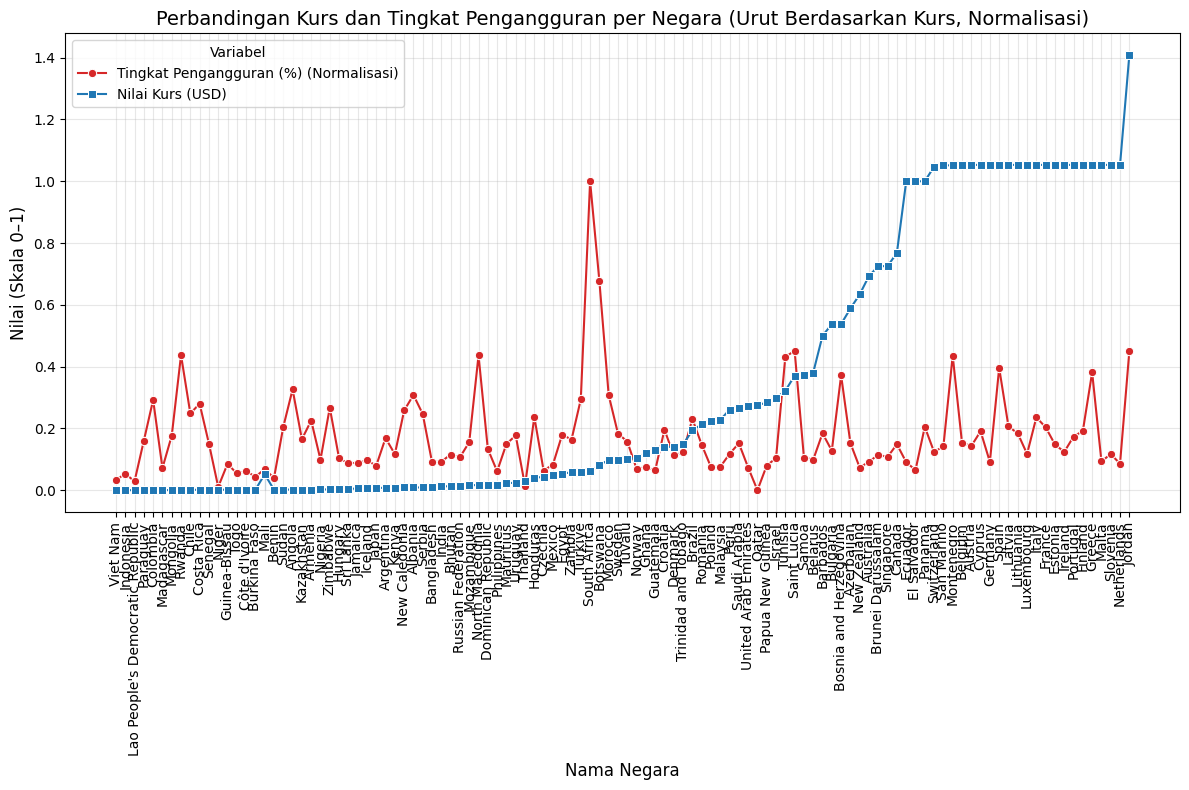

In [ ]:
df_norm = df_integrasi.copy()

scaler = MinMaxScaler()
df_norm['Nilai_Normalized'] = scaler.fit_transform(df_norm[['Tingkat Pengangguran (%)']])
df_sorted = df_norm.sort_values('Kurs_2022_usd', ascending=True)

# plotting
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_sorted,
    x='Nama_Negara',
    y='Nilai_Normalized',
    marker='o',
    label='Tingkat Pengangguran (%) (Normalisasi)',
    color='tab:red'
)

sns.lineplot(
    data=df_sorted,
    x='Nama_Negara',
    y='Kurs_2022_usd',
    marker='s',
    label='Nilai Kurs (USD)',
    color='tab:blue'
)

plt.title('Perbandingan Kurs dan Tingkat Pengangguran per Negara (Urut Berdasarkan Kurs, Normalisasi)', fontsize=14)
plt.xlabel('Nama Negara', fontsize=12)
plt.ylabel('Nilai (Skala 0–1)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Variabel')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Benua

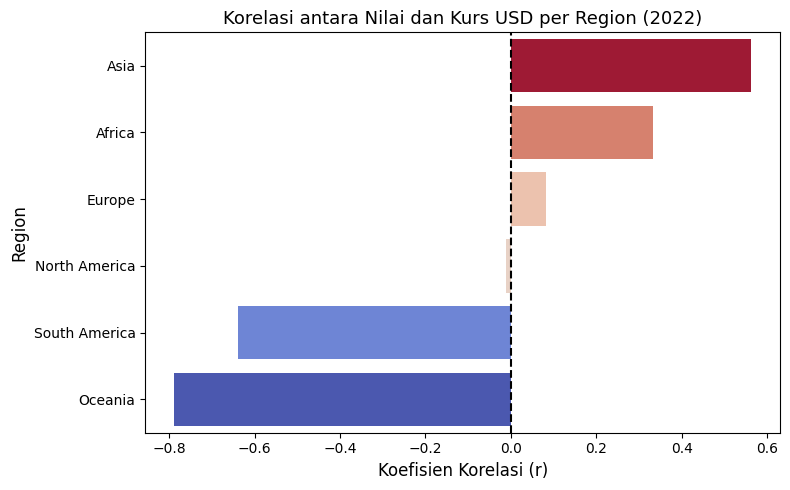

In [ ]:
df_corr = pd.DataFrame(list(kor.items()), columns=['Region', 'Korelasi'])
df_corr = df_corr.sort_values('Korelasi', ascending=False)

# plotting
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_corr,
    x='Korelasi',
    y='Region',
    palette='coolwarm',
    hue='Korelasi',
    dodge=False
)

plt.title('Korelasi antara Nilai dan Kurs USD per Region (2022)', fontsize=13)
plt.xlabel('Koefisien Korelasi (r)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.legend([],[], frameon=False)
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

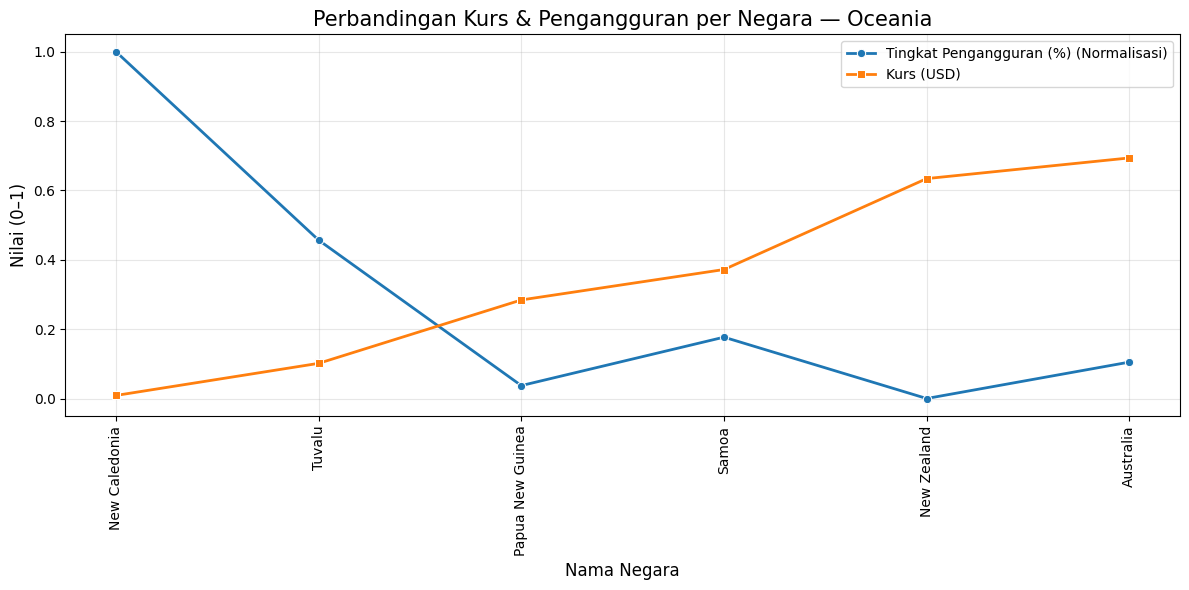

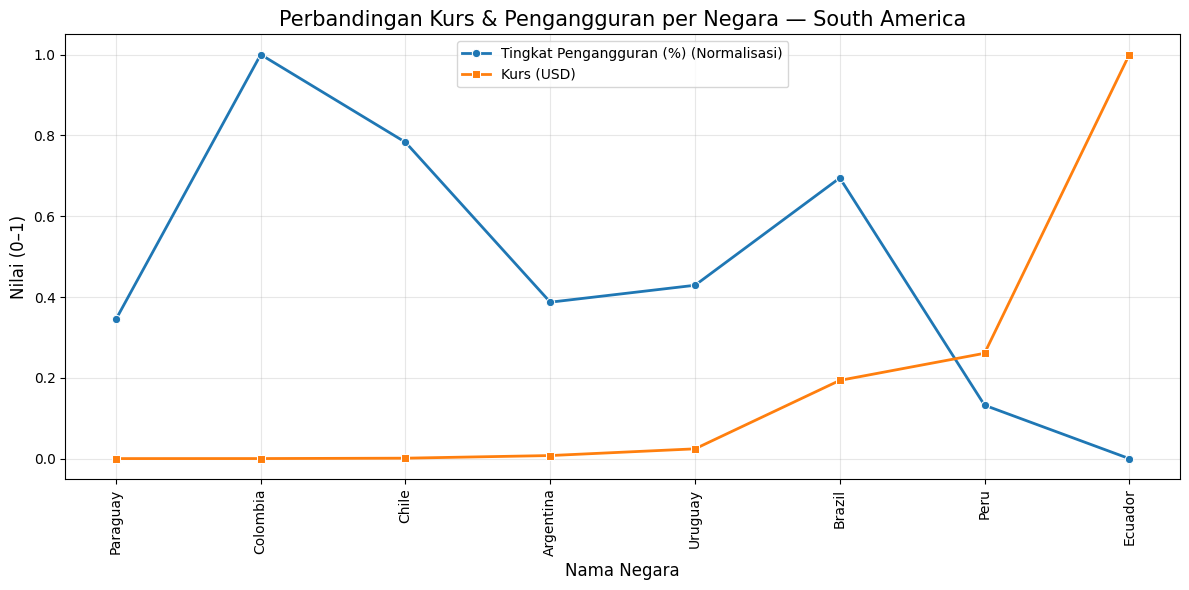

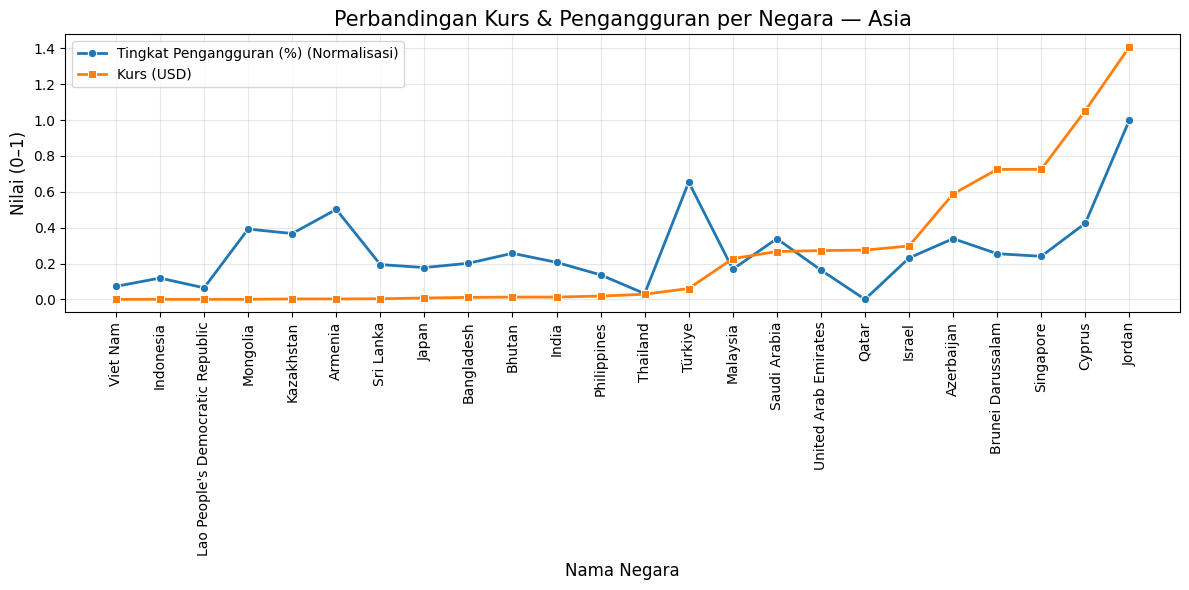

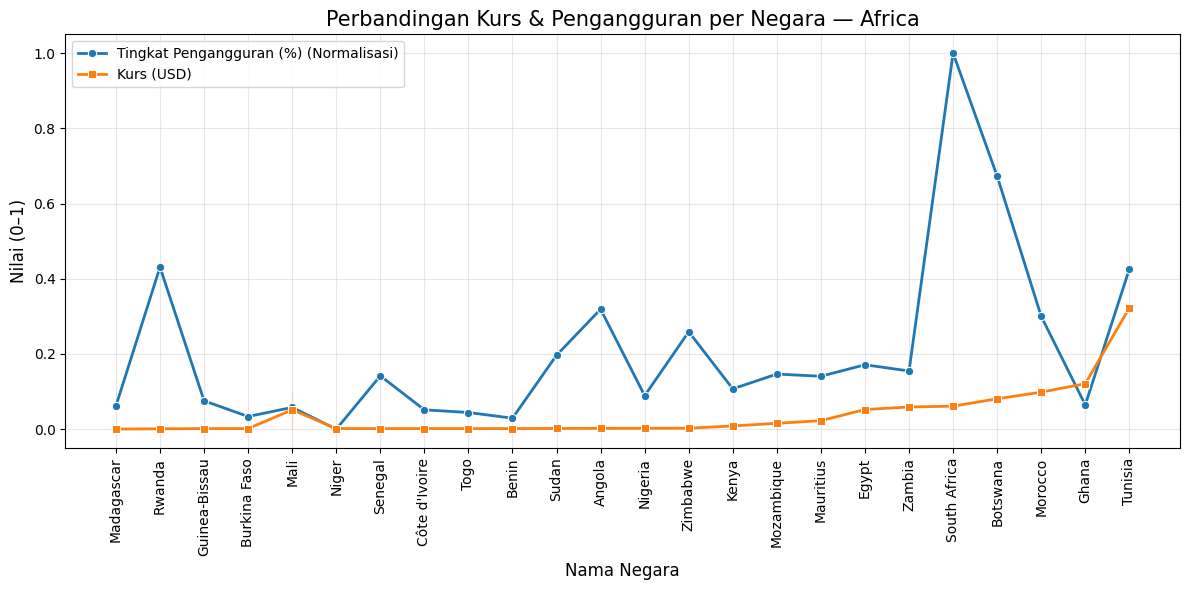

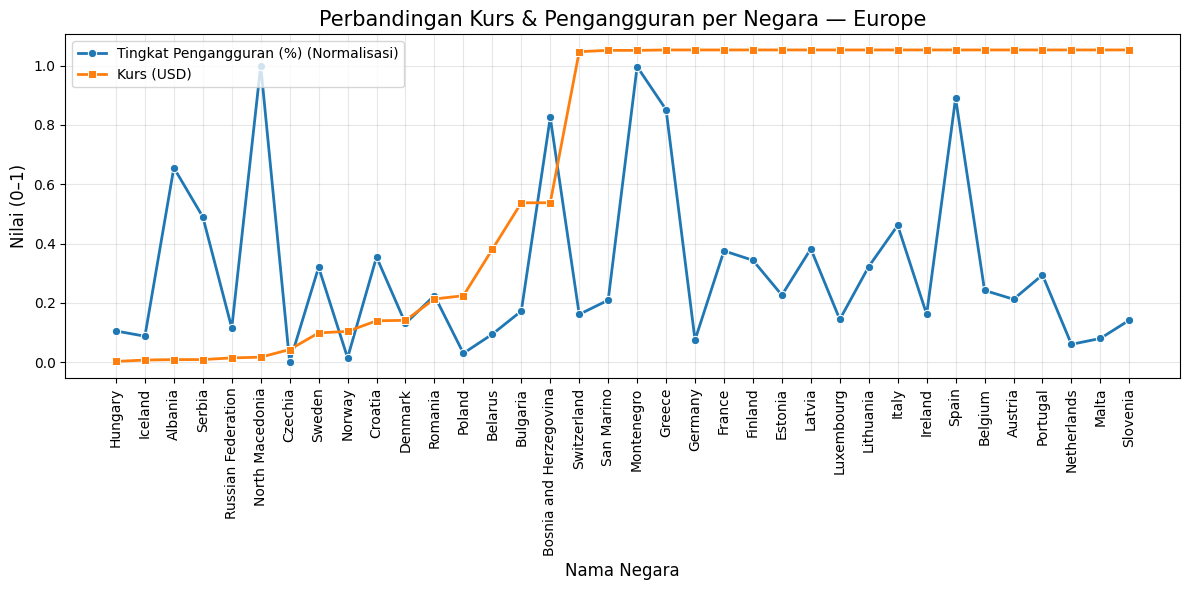

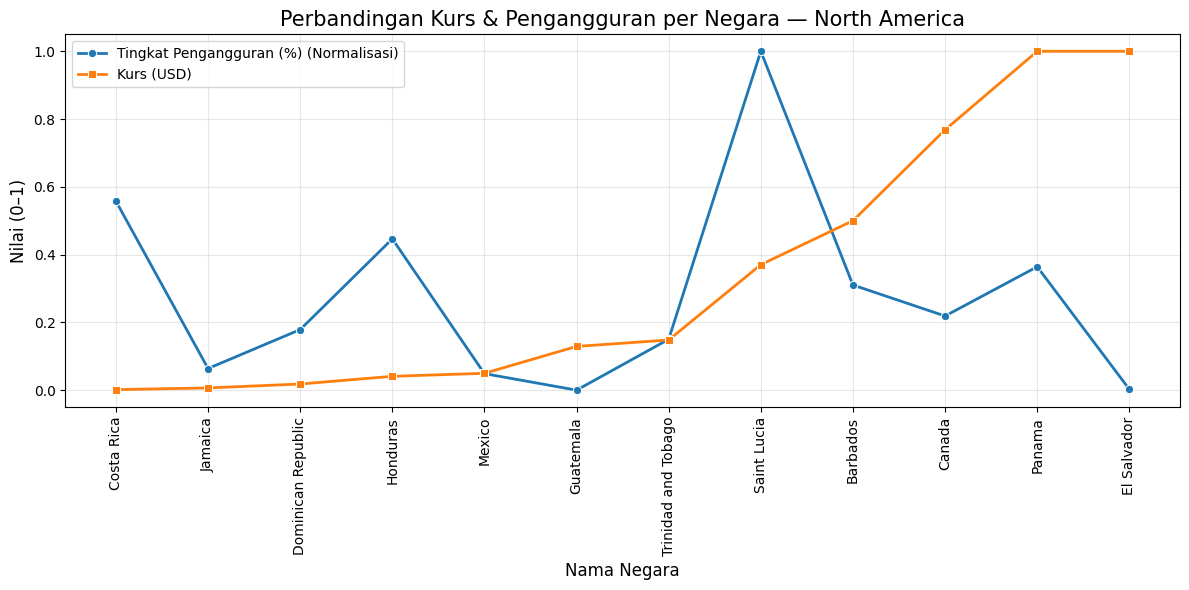

In [ ]:
urutan_benua = [
    "Oceania",
    "South America",
    "Asia",
    "Africa",
    "Europe",
    "North America",
]

for region in urutan_benua:
    df_reg = df_integrasi[df_integrasi["Region"] == region]

    df_temp = df_reg.copy()
    df_temp["Nilai_Normalized"] = MinMaxScaler().fit_transform(df_temp[["Tingkat Pengangguran (%)"]])

    df_temp = df_temp.sort_values("Kurs_2022_usd")

    # plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_temp,
        x="Nama_Negara",
        y="Nilai_Normalized",
        marker='o',
        linewidth=2,
        label="Tingkat Pengangguran (%) (Normalisasi)"
    )

    sns.lineplot(
        data=df_temp,
        x="Nama_Negara",
        y="Kurs_2022_usd",
        marker='s',
        linewidth=2,
        label="Kurs (USD)"
    )

    plt.title(f"Perbandingan Kurs & Pengangguran per Negara — {region}", fontsize=15)
    plt.xlabel("Nama Negara", fontsize=12)
    plt.ylabel("Nilai (0–1)", fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
